<h3>Importing Libraries</h3>

In [1]:
import re
import json
import string
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

<h3>Loading data into dataframe</h3>

In [2]:
path = 'Data/News_Category_Dataset.csv'
data = pd.read_csv(path)
data.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   category           200853 non-null  object
 1   headline           200847 non-null  object
 2   authors            164233 non-null  object
 3   link               200853 non-null  object
 4   short_description  181141 non-null  object
 5   date               200853 non-null  object
dtypes: object(6)
memory usage: 9.2+ MB


In [4]:
data.isnull().sum()

category                 0
headline                 6
authors              36620
link                     0
short_description    19712
date                     0
dtype: int64

<h3>EDA & Visualization</h3>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'POLITICS'),
  Text(1, 0, 'WELLNESS'),
  Text(2, 0, 'ENTERTAINMENT'),
  Text(3, 0, 'TRAVEL'),
  Text(4, 0, 'STYLE & BEAUTY'),
  Text(5, 0, 'PARENTING'),
  Text(6, 0, 'HEALTHY LIVING'),
  Text(7, 0, 'QUEER VOICES'),
  Text(8, 0, 'FOOD & DRINK'),
  Text(9, 0, 'BUSINESS'),
  Text(10, 0, 'COMEDY'),
  Text(11, 0, 'SPORTS'),
  Text(12, 0, 'BLACK VOICES'),
  Text(13, 0, 'HOME & LIVING'),
  Text(14, 0, 'PARENTS'),
  Text(15, 0, 'THE WORLDPOST'),
  Text(16, 0, 'WEDDINGS'),
  Text(17, 0, 'WOMEN'),
  Text(18, 0, 'IMPACT'),
  Text(19, 0, 'DIVORCE'),
  Text(20, 0, 'CRIME'),
  Text(21, 0, 'MEDIA'),
  Text(22, 0, 'WEIRD NEWS'),
  Text(23, 0, 'GREEN'),
  Text(24, 0, 'WORLDPOST'),
  Text(25, 0, 'RELIGION'),
  Text(26, 0, 'STYLE'),
  Text(27, 0, 'SCIENCE'),
  Text(28, 0, 'WORLD NEWS'),
  Text(29, 0, 'TAS

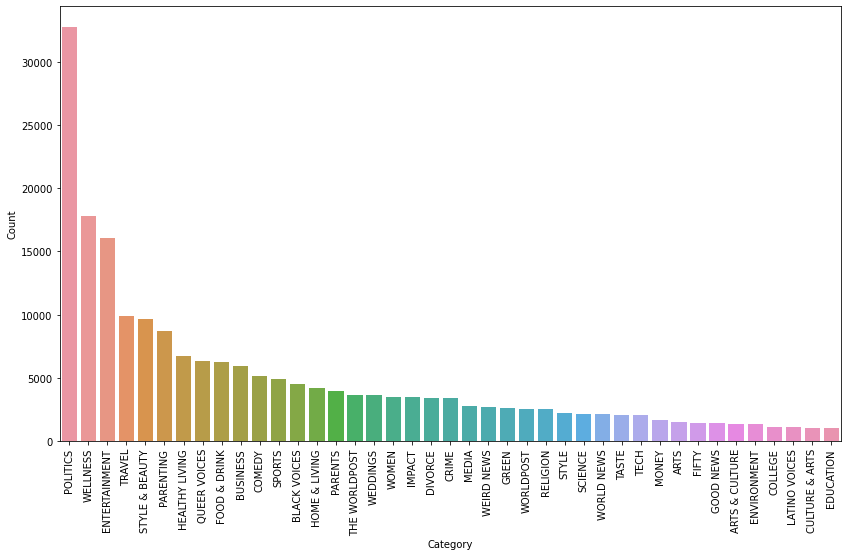

In [6]:
plt.figure(figsize=(14,8))
count = data.category.value_counts()
sns.barplot(x=count.index, y=count)
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)

<h3>Creating new dataframe as we will work with only headline, category and short_description</h3>

In [7]:
df = data[['category', 'headline', 'short_description']]
df.head()

,category,headline,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."


In [8]:
df.isnull().sum()

category                 0
headline                 6
short_description    19712
dtype: int64

<h3>Removing empty rows and preparing dataset</h3>

In [9]:
df = df[~df['headline'].isnull()]

In [10]:
df.isnull().sum()

category                 0
headline                 0
short_description    19707
dtype: int64

In [11]:
df['text'] = df['headline'] + ' ' + df['short_description']
df.head()

,category,headline,short_description,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...


<h3>Cleaning texts</h3>

In [11]:
def cleanText(text):
    text = str(text)
    text = text.lower()                                  # lower-case all characters
    text =  re.sub(r'@\S+', '',text)                     # remove twitter handles
    text =  re.sub(r'http\S+', '',text)                  # remove urls
    text =  re.sub(r'pic.\S+', '',text)
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)             # only keeps characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # keep words with length>1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')   # remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text= re.sub("\s[\s]+", " ",text).strip()            # remove repeated/leading/trailing spaces
    return text

In [12]:
df['clean_text'] = df.text.apply(cleanText)
df.head()

,category,headline,short_description,text,clean_text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,mass shootings texas last week left husband ki...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,smith joins diplo nicky jam world cups officia...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 5...,hugh grant marries first time age actor longti...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,jim carrey blasts castrato adam schiff democra...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,julianna margulies uses donald trump poop bags...


<h3>Combine similar categories</h3>

In [12]:
df.category[df.category=='THE WORLDPOST'] = 'WORLDPOST'
df.category[df.category=='GREEN'] = 'ENVIRONMENT'
df.category[df.category=='CULTURE & ARTS'] = 'ARTS'
df.category[df.category=='COMEDY'] = 'ENTERTAINMENT'
df.category[df.category=='STYLE'] = 'STYLE & BEAUTY'
df.category[df.category=='ARTS & CULTURE'] = 'ARTS'
df.category[df.category=='COLLEGE'] = 'EDUCATION'
df.category[df.category=='SCIENCE'] = 'TECH'
df.category[df.category=='WEDDINGS'] = 'GOOD NEWS'
df.category[df.category=='TASTE'] = 'FOOD & DRINK'
df.category[(df.category=='PARENTING') | (df.category=='FIFTY')] = 'PARENTS'
df.category[df.category=='WORLD NEWS'] = 'WORLDPOST'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'POLITICS'),
  Text(1, 0, 'ENTERTAINMENT'),
  Text(2, 0, 'WELLNESS'),
  Text(3, 0, 'PARENTS'),
  Text(4, 0, 'STYLE & BEAUTY'),
  Text(5, 0, 'TRAVEL'),
  Text(6, 0, 'WORLDPOST'),
  Text(7, 0, 'FOOD & DRINK'),
  Text(8, 0, 'HEALTHY LIVING'),
  Text(9, 0, 'QUEER VOICES'),
  Text(10, 0, 'BUSINESS'),
  Text(11, 0, 'GOOD NEWS'),
  Text(12, 0, 'SPORTS'),
  Text(13, 0, 'BLACK VOICES'),
  Text(14, 0, 'TECH'),
  Text(15, 0, 'HOME & LIVING'),
  Text(16, 0, 'ENVIRONMENT'),
  Text(17, 0, 'ARTS'),
  Text(18, 0, 'WOMEN'),
  Text(19, 0, 'IMPACT'),
  Text(20, 0, 'DIVORCE'),
  Text(21, 0, 'CRIME'),
  Text(22, 0, 'MEDIA'),
  Text(23, 0, 'WEIRD NEWS'),
  Text(24, 0, 'RELIGION'),
  Text(25, 0, 'EDUCATION'),
  Text(26, 0, 'MONEY'),
  Text(27, 0, 'LATINO VOICES')])

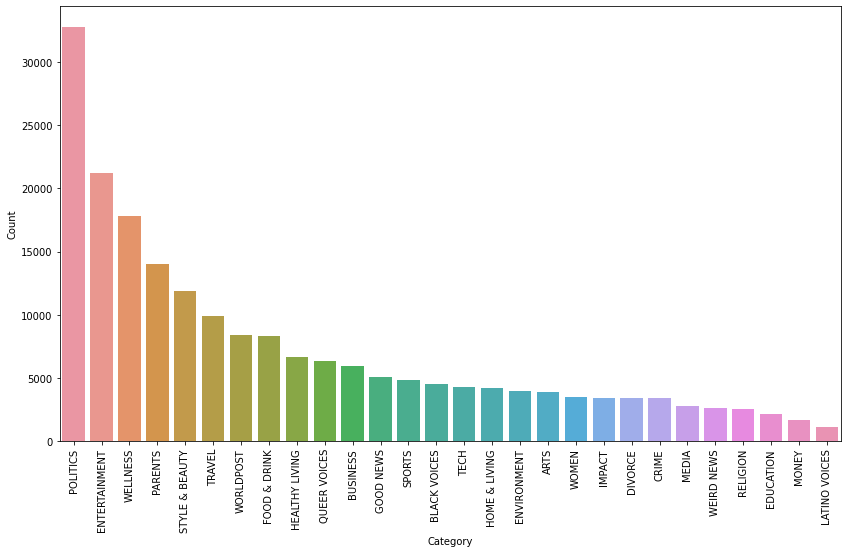

In [16]:
plt.figure(figsize=(14,8))
count = df.category.value_counts()
sns.barplot(x=count.index, y=count)
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)

In [17]:
df.head()

,category,headline,short_description,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...


<h3>Creating TF-IDF Vectorizer</h3>

In [15]:
tfidf = TfidfVectorizer(analyzer='word')
X = tfidf.fit_transform(df['clean_text'])

In [16]:
Y = df['category']

<h3>Train test split</h3>

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

<h3>Training model with naive_bayes classifier</h3>

In [18]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

<h3>Test & Train Accuracy</h3>

In [19]:
Acc_train = nb.score(X_train, y_train)
acc_test = nb.score(X_test, y_test)
print('Train Accuracy : {:.2f}%'.format(Acc_train*100))
print('Test Accuracy  : {:.2f}%'.format(acc_test*100))

Train Accuracy : 48.34%
Test Accuracy  : 44.83%


<h3>Training model with logistic regression</h3>

In [20]:
lr = LogisticRegression(solver='saga')
lr.fit(X_train, y_train)

LogisticRegression(solver='saga')

<h3>Test & Train Accuracy</h3>

In [21]:
Acc_train = lr.score(X_train, y_train)
acc_test = lr.score(X_test, y_test)
print('Train Accuracy : {:.2f}%'.format(Acc_train*100))
print('Test Accuracy  : {:.2f}%'.format(acc_test*100))

Train Accuracy : 69.57%
Test Accuracy  : 60.99%


<h3>Training model with SGD Classifier</h3>

In [22]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

SGDClassifier()

<h3>Test & Train Accuracy</h3>

In [23]:
Acc_train = sgd.score(X_train, y_train)
acc_test = sgd.score(X_test, y_test)
print('Train Accuracy : {:.2f}%'.format(Acc_train*100))
print('Test Accuracy  : {:.2f}%'.format(acc_test*100))

Train Accuracy : 65.21%
Test Accuracy  : 57.40%


<h3>Training model with Linear SVC</h3>

In [24]:
svc = LinearSVC()
svc.fit(X_train, y_train)

LinearSVC()

<h3>Test & Train Accuracy</h3>

In [25]:
Acc_train = svc.score(X_train, y_train)
acc_test = svc.score(X_test, y_test)
print('Train Accuracy : {:.2f}%'.format(Acc_train*100))
print('Test Accuracy  : {:.2f}%'.format(acc_test*100))

Train Accuracy : 85.34%
Test Accuracy  : 61.46%


<h2>Classification Reports</h2>

<h3>Naive_bayes</h3>

In [26]:
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

e:\work\ju_project\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

          ARTS       1.00      0.01      0.02       775
  BLACK VOICES       0.00      0.00      0.00       906
      BUSINESS       0.50      0.01      0.01      1187
         CRIME       0.80      0.01      0.01       681
       DIVORCE       1.00      0.03      0.06       685
     EDUCATION       0.00      0.00      0.00       429
 ENTERTAINMENT       0.47      0.62      0.54      4247
   ENVIRONMENT       0.67      0.00      0.01       789
  FOOD & DRINK       0.87      0.57      0.69      1664
     GOOD NEWS       0.95      0.15      0.26      1010
HEALTHY LIVING       1.00      0.00      0.00      1339
 HOME & LIVING       0.96      0.16      0.28       839
        IMPACT       0.00      0.00      0.00       692
 LATINO VOICES       0.00      0.00      0.00       226
         MEDIA       0.00      0.00      0.00       563
         MONEY       0.00      0.00      0.00       341
       PARENTS       0.57      0.56      0.57  

e:\work\ju_project\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\work\ju_project\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h3>Logistic Regression</h3>

In [27]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

          ARTS       0.63      0.33      0.43       775
  BLACK VOICES       0.59      0.32      0.41       906
      BUSINESS       0.55      0.39      0.45      1187
         CRIME       0.64      0.36      0.46       681
       DIVORCE       0.87      0.64      0.74       685
     EDUCATION       0.54      0.27      0.36       429
 ENTERTAINMENT       0.39      0.81      0.53      4247
   ENVIRONMENT       0.56      0.35      0.43       789
  FOOD & DRINK       0.76      0.79      0.78      1664
     GOOD NEWS       0.77      0.55      0.64      1010
HEALTHY LIVING       0.44      0.08      0.14      1339
 HOME & LIVING       0.80      0.72      0.75       839
        IMPACT       0.51      0.21      0.30       692
 LATINO VOICES       0.84      0.16      0.27       226
         MEDIA       0.59      0.23      0.33       563
         MONEY       0.67      0.34      0.45       341
       PARENTS       0.63      0.69      0.66  

<h3>SGD Classifier</h3>

In [28]:
y_pred = sgd.predict(X_test)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

          ARTS       0.64      0.28      0.39       775
  BLACK VOICES       0.55      0.22      0.32       906
      BUSINESS       0.59      0.27      0.37      1187
         CRIME       0.62      0.29      0.39       681
       DIVORCE       0.79      0.66      0.72       685
     EDUCATION       0.56      0.22      0.32       429
 ENTERTAINMENT       0.61      0.58      0.60      4247
   ENVIRONMENT       0.54      0.25      0.34       789
  FOOD & DRINK       0.69      0.82      0.75      1664
     GOOD NEWS       0.70      0.58      0.63      1010
HEALTHY LIVING       0.26      0.03      0.06      1339
 HOME & LIVING       0.71      0.70      0.71       839
        IMPACT       0.48      0.13      0.20       692
 LATINO VOICES       0.64      0.16      0.26       226
         MEDIA       0.59      0.17      0.26       563
         MONEY       0.59      0.25      0.35       341
       PARENTS       0.60      0.70      0.65  

<h3>Linear SVC</h3>

In [29]:
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))


                precision    recall  f1-score   support

          ARTS       0.58      0.39      0.47       775
  BLACK VOICES       0.53      0.39      0.45       906
      BUSINESS       0.51      0.39      0.45      1187
         CRIME       0.58      0.40      0.48       681
       DIVORCE       0.81      0.70      0.75       685
     EDUCATION       0.50      0.34      0.41       429
 ENTERTAINMENT       0.41      0.76      0.53      4247
   ENVIRONMENT       0.53      0.41      0.46       789
  FOOD & DRINK       0.74      0.80      0.77      1664
     GOOD NEWS       0.71      0.58      0.64      1010
HEALTHY LIVING       0.31      0.13      0.18      1339
 HOME & LIVING       0.76      0.76      0.76       839
        IMPACT       0.43      0.25      0.31       692
 LATINO VOICES       0.68      0.35      0.47       226
         MEDIA       0.56      0.32      0.41       563
         MONEY       0.58      0.43      0.49       341
       PARENTS       0.63      0.66      0.65  